In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

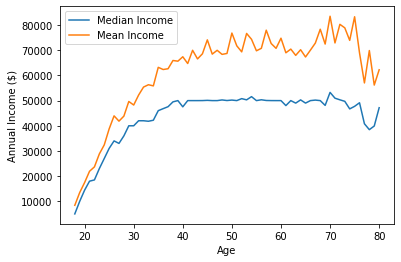

In [2]:
### QUESTION 0: 

# How does income increase with age, and does having 
# more years of work experience lead to higher compensation?

income_by_age = pd.read_csv('clean_data/loan_data.csv')
data0 = income_by_age.set_index('age')
_ = plt.plot(data0[['median_income', 'mean_income']])
plt.legend(['Median Income', 'Mean Income'])
plt.ylabel('Annual Income ($)')
plt.xlabel('Age')
plt.show()

In [ ]:
### Answer 0:
# For employees between the age of 18 and 40, there is a direct 
# correlation between compensation and age due to having 
# more years of work experience.
# For employees over the age of 40, there is a plateau in the median 
# data shows there is no significant difference between 20 and 50
# years of experience. 
# The mean trend line continues to increase as it accounts for employees
# in careers that allow for continued growth and increasing compensation.
# There is a plateau in median income due to much of the workforce being
# employed in low skill jobs that compensate by the hour. 

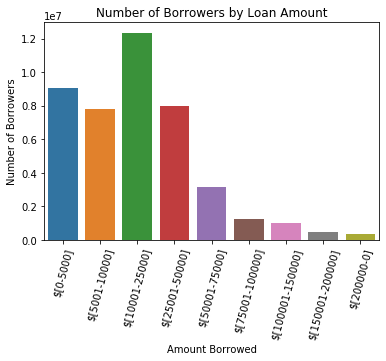

In [3]:
### Question 1
# What is the Loan Balance Landscape for borrowers?
borrowers = pd.read_csv('clean_data/borrowers_2014.csv')
data1 = borrowers.copy()
data1 = data1.fillna(0)

data1['range'] = '$['+data1.minBal.astype(int).astype(str)+'-'+data1.maxBal.astype(int).astype(str)+']'

_ = sns.barplot(y='NumberOfBorrowers', x='range', data=data1)

plt.xticks(rotation=75)
plt.title('Number of Borrowers by Loan Amount')
plt.ylabel('Number of Borrowers')
plt.xlabel('Amount Borrowed')
plt.show()

In [ ]:
### Answer 1:
# A majority of the population holds less that $50,000 
# of student loan debt. This amount of debt is tolerable
# when comparing to the mean and median income.For most cases,
# The amount of Student Debt does not excede median annual income.
# For the cases of much greater debt holders, those are most likely
# students pursuing higher education for a specialized career. Those
# with more student Loan Debt are more likely to work in higher paying
# carreers with compensation that justifies the investment in Education.

In [4]:
### Question 1.2
# Could you make a Cumulative Distribution Function with this data?

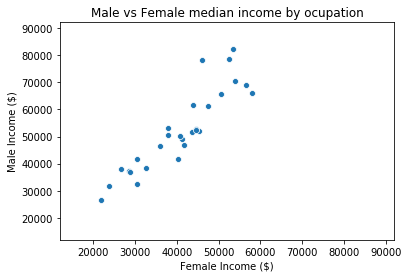

In [5]:
### Question 2:
# What is the Relationship between median income for Males and Females 
# within each ocupation for a given year?
ocup_data = pd.read_csv('clean_data/ocup_data.csv')
data2 = ocup_data.copy()
data2 = data2.set_index(['ocupation', 'gender'])
data2 = data2.unstack(level='gender')

#scatter plot comparing male vs female income within individual ocupation categories
_ = sns.scatterplot(x=('2014', 'Female'), y=('2014', 'Male'), data=data2)

# identify limits of Domain and Range
min_income = min([min(data2[('2014', 'Female')]), min(data2[('2014', 'Male')])])
max_income = max([max(data2[('2014', 'Female')]), max(data2[('2014', 'Male')])])

# add padding
min_income -= 10000
max_income += 10000

# set axis
_ = plt.axis([min_income, max_income, min_income, max_income])

#
plt.title('Male vs Female median income by ocupation')
plt.xlabel('Female Income ($)')
plt.ylabel('Male Income ($)')

# show scatter plot
plt.show()

In [ ]:
### Answer 2:
# The answer is simple and clearly depicts a wage gap between males and females.
# In the scatter plot, each point represents a single occupational
# category. The points horizontal position describes the median income 
# for females in that single occupational category. The vertical position
# of the point corresponds the median income of males in that 
# same occupational category.
# The trend line for this scatter plot has a slope that is greater
# than 1. This describes the trend that men are compensated more than
# women in the same line of work. 

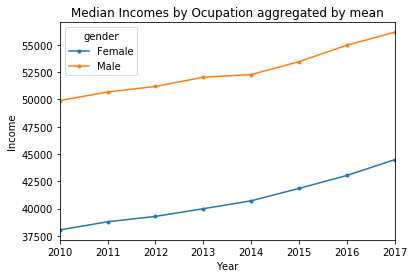

In [6]:
### QUESTION 3:
# How does male income compare to female income overall?

# Time series plot of median income by year 
cols2keep = list(ocup_data.columns)[:-1]
data3 = ocup_data[cols2keep]

#group median incomes by ocupation and aggregate by mean
data3 = data3.groupby('gender').mean()
data3 = data3.transpose()

# create plot
_ = data3.plot(marker='.')

#set title and axis labels
plt.title('Median Incomes by Ocupation aggregated by mean')
plt.xlabel('Year')
plt.ylabel('Income')

#show plot
plt.show()


In [ ]:
### Answer 3:
# When an average of the medain income by ocupation is computed separately
# for males and females, there are two clear trends when consectutive years
# are plotted as a time-series. 
# The first of the two trends show tha the average compensation accross
# the many different compensations is increasing over time.
# This means people are getting paid for doing the same types of work.
# The second trend is the amount of separation between the two almost
# parallel curves. Both the male and female curves increase with time,
# but the curve describing median income for males remains approximately
# $10,000 above median income curve for females.

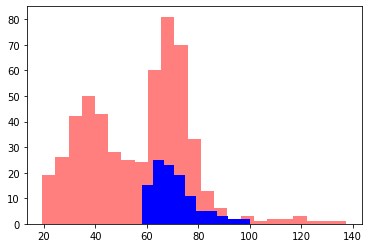

In [7]:
#QUESTION 4:
# How does the cost of living in the US compare to other countries?
cost_living = pd.read_csv('clean_data/cost_of_living.csv')
#cost of living index throughout the world highlighting the US.
data4 = cost_living.copy()
data4 = data4[data4.country == ' United States']
_ = plt.hist(cost_living.cost_of_living, bins=int(np.sqrt(cost_living.shape[0])), color='red', alpha=0.5)
_ = plt.hist(data4.cost_of_living, bins=int(np.sqrt(data4.shape[0])), color='blue')
plt.show()

In [ ]:
### Answer 4:
# The cost of living throughout the world appears to be a 
# bimodal distribution. Which separates the world into two groups:
# Those with a higher cost of living, and those with a lower cost of living.
# The cost of living in the US appears to be in the lower portion of
# the group with a higher cost of living

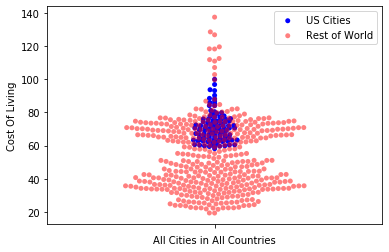

In [8]:
### Question 5:
# Is there a better way to visualize cost of living in the world
# make a beeswarm plot
data5 = cost_living.copy()
us_data = data5[data5.country == ' United States']
not_us = data5[data5.country != ' United States']
#plt.axes([0,0,1,0.5])
_ = sns.swarmplot(x='country', y='cost_of_living', data=us_data, color='blue')
_ = sns.swarmplot(y='cost_of_living', data=not_us, color='red', alpha=0.5)
_ = plt.xticks(rotation=90)
plt.legend(['US Cities', 'Rest of World'])
plt.xlabel('All Cities in All Countries')
plt.ylabel('Cost Of Living')
plt.show()

In [ ]:
### Answer 5:
# bee swarm plot is a better way to visualize the cost of living data
# when compared to the previous histogram. 
# Again, you can see the US is part of the cluster for cities with
# a higher cost of living. In the beeswarm plot, it is more evident that
# the distribution is similar to the rest of the cities in the high cost
# of living group. With the exception that many of the outliers are 
# non-US cities. 

# Precaution: Separating and overlaying the US data distorts the data
# in a way that makes determining which of the bimodal groups are larger.

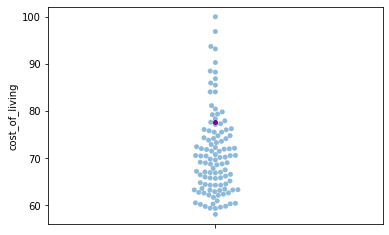

In [9]:
### Question 6:
# How does the cost of living in a single city like Los Angeles 
# compare to other cities in the US?

los_angeles = us_data[us_data.city == 'Los Angeles']
_ = sns.swarmplot(y='cost_of_living', data=us_data, alpha=0.5)
_ = sns.swarmplot(y='cost_of_living', data=los_angeles, color='purple')
plt.show()

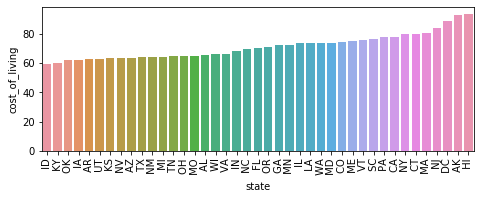

In [10]:
### Question 7:
# How does the Average Cost of Living vary by state?
data7 = us_data.copy()
data7 = data7.groupby('state').mean()
data7.head()

data7['state'] = data7.index
data7 = data7.sort_values('cost_of_living')

plt.axes([0,0,1,0.5])
_ = sns.barplot(x='state', y='cost_of_living', data=data7)

plt.xticks(rotation=90)
plt.show()

In [11]:
#Conclusion:
# College is an unfair investment for women. 
# The data shows men have a better return on investment due to the wage gap.